# Load Libraries

In [251]:
# Import packages/libraries
import warnings
warnings.filterwarnings("ignore")
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# to display graphs in Jupyter notebook
%matplotlib inline       


# Load and Explore the Data

In [191]:
data = pd.read_excel("Credit Card Customer Data.xlsx")
data.shape
df = data.copy()

### Check the number of rows and columns

In [192]:
df.shape

(660, 7)

### Check column names

In [193]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

### Overview of Data

In [194]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [195]:
df.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [196]:
#dropping the Sl no. and Customer Key and  column as it does not hold any statistical significance
df.drop(['Sl_No', 'Customer Key'], axis=1,inplace=True)

#### Check for duplicate values

In [197]:
# lets check duplicate observations
df.duplicated().sum()

11

* There are 11 duplicate values, remove them.

In [198]:
df = df[(~df.duplicated())].copy()

In [199]:
df.duplicated().sum()

0

* No more duplicatae values

### Check column types and missing values

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     649 non-null    int64
 1   Total_Credit_Cards   649 non-null    int64
 2   Total_visits_bank    649 non-null    int64
 3   Total_visits_online  649 non-null    int64
 4   Total_calls_made     649 non-null    int64
dtypes: int64(5)
memory usage: 30.4 KB


### Summary of dataset

In [201]:
df.describe(include = 'all')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,34878.274268,4.708783,2.397535,2.624037,3.590139
std,37813.736638,2.173763,1.625148,2.952888,2.877911
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,11000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,49000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### OBSERVATIONS:
* total no of rows is 660
* total no of columns is 7
* All varibales are numerical variables
* median of Avg_Credit_Limit is 18,000 with std of 37,625
* Avg_Credit_Limit is right skewed
* all other variables are also slightly right skewed


In [202]:
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### There are no missing values in the data

## EDA numerical data

### Univariate Analysis

In [203]:
pd.set_option('display.float_format', lambda x: '%3f' %x)  #to display numbers in digits

In [204]:
# function to plot boxplot and histogram of variable

def histo_box(data,figsize=(15,10), bins =None):
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize )
    
    sns.boxplot(data,ax = ax_box, showmeans=True, color='violet') #plot a boxplot of data with a green triangle marking the mean value 

    
    sns.distplot(data,ax = ax_hist)      # plot histogram of data
    ax_hist.axvline(np.mean(data),color = 'green', linestyle = '--')
    ax_hist.axvline(np.median(data),color = 'black', linestyle = '-')
    plt.show()
 #   sns.violinplot(data, ax = ax_violin, showmeans = True)              # violin plot of data
    

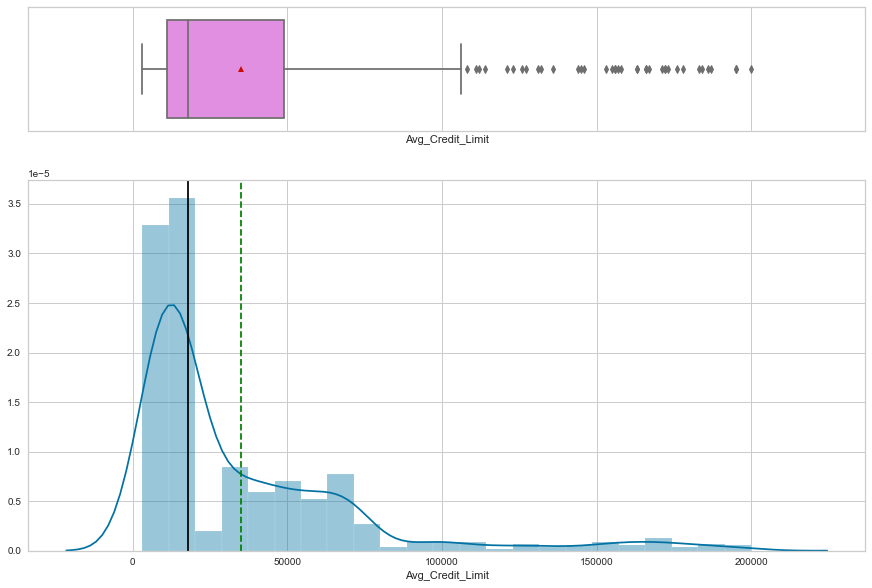

In [205]:
#see distribution for Age

histo_box(df['Avg_Credit_Limit'])



####   OBSERVATIONS:
* Avg_Credit_Limit has many outliers.
* Avg_Credit_Limit is heavily right skewed becaue of the outliers.
* mean is almsot double that of the median credit limit.

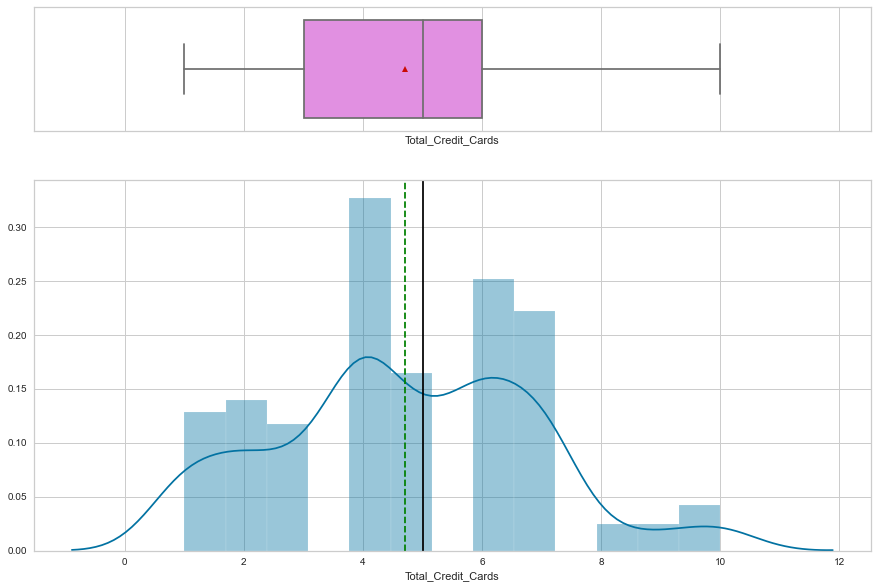

In [206]:
#see distribution for Experience

histo_box(df['Total_Credit_Cards'])


####   OBSERVATIONS:
* Total_Credit_Cards does not have any outliers.
* 75% of people have 6 or less credit cards

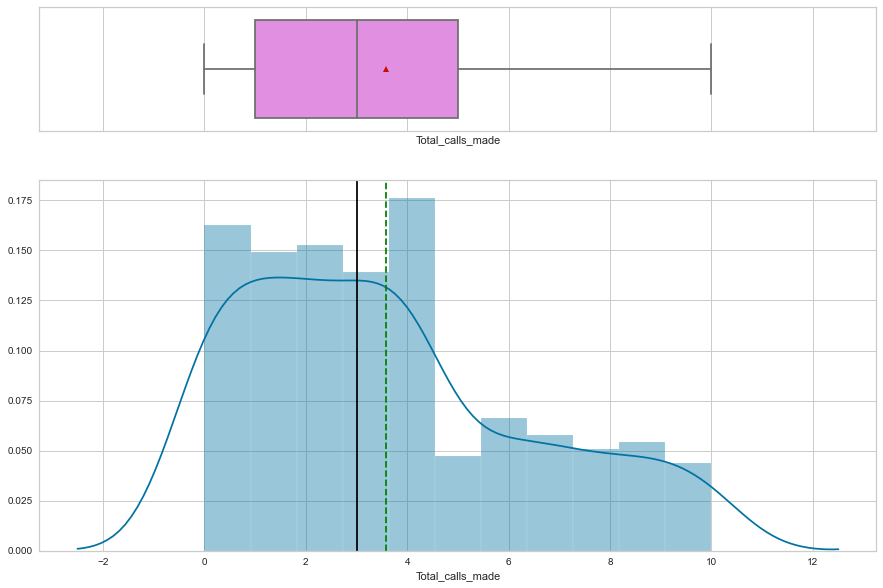

In [207]:
#see distribution for Income

histo_box(df['Total_calls_made'])


####   OBSERVATIONS:
* Total_calls_made has no outliers.
* 75% of people made 5 or less calls.

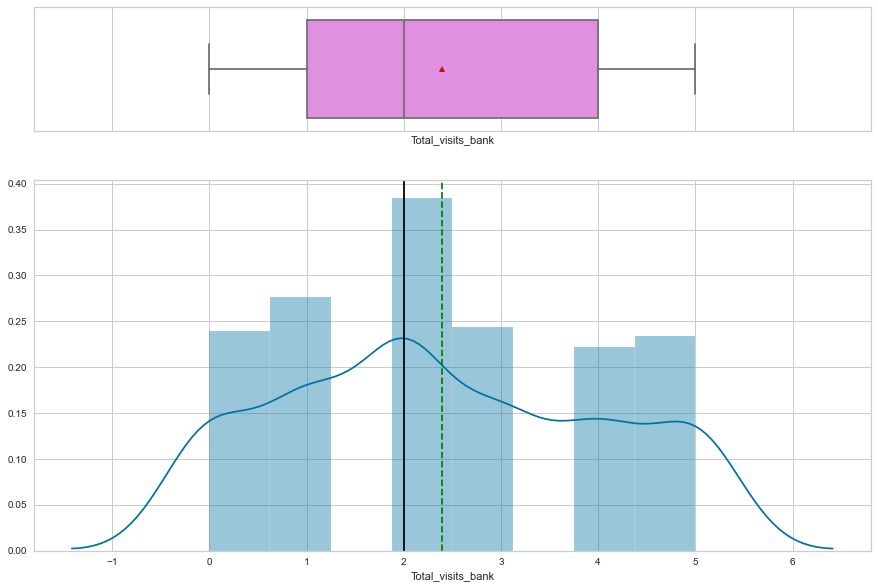

In [208]:
#see distribution for ZIPcode

histo_box(df['Total_visits_bank'])

####   OBSERVATIONS:
* Total_visits_bank has no outliers.
* Total_visits_bank is a little right skewed.
* 75% of. people visited the bank 4 or less times.

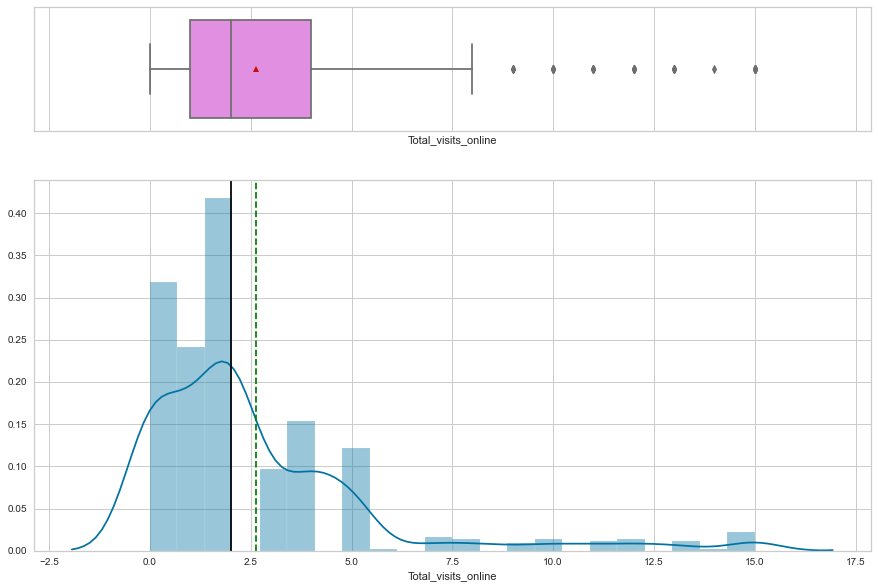

In [209]:
#see distribution for CCAvg

histo_box(df['Total_visits_online'])

####   OBSERVATIONS:
* Total_visits_online has a lot of upper outliers which means that some people call the bank many times.
* Total_visits_online is a little right skewed.
* 75% of people made about 4 or less online visits.


## BiVariate analysis

#### Let's make pairplots

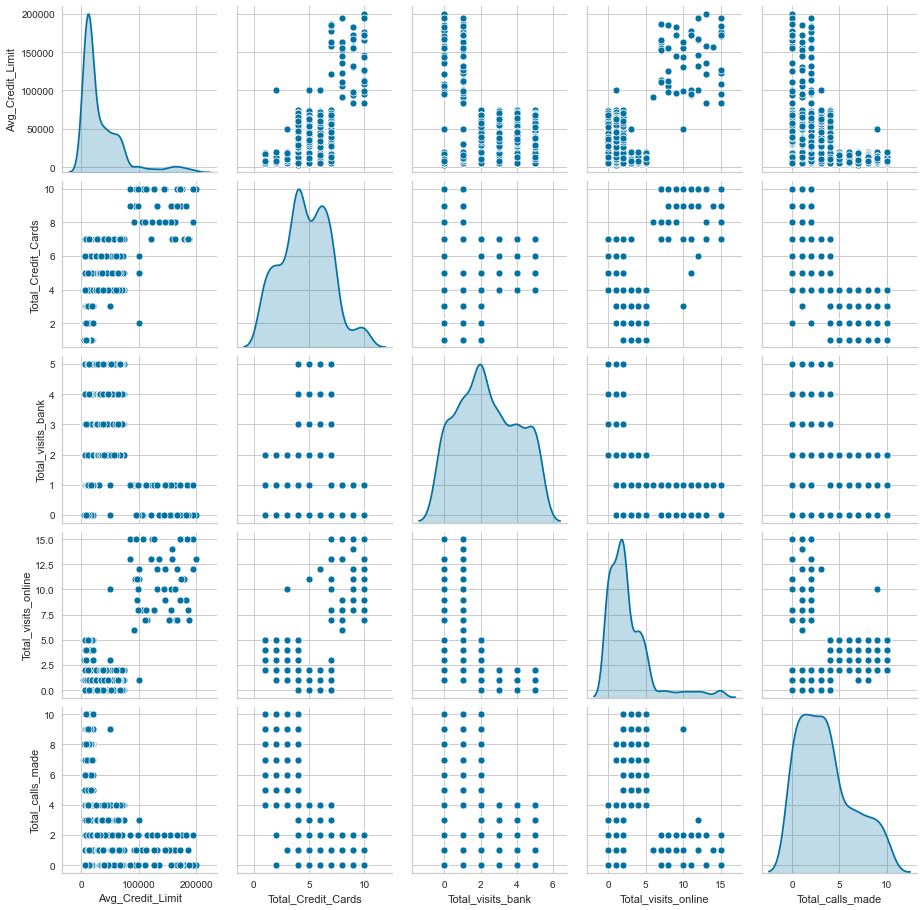

In [210]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**
* Clients with higher Avg_Credit_Limit have a higher number of ncredit cards.
* Clients with higher Avg_Credit_Limit have a higher number of online visits and they make very few visits and calls to the bank
* Clients with lower Avg_Credit_Limit make more visits to the bank and call it more often too.
* clients who own 4-7 credit cards make the most visits to the bank.
* clients who make more online visits do not make bank visits that often.
* clients who visit the bank online more often have a higher avg credit limit, higher number of credit cards, and do not call or visit the bank that often.

### CORREALTION MATRIX OF NUMERICAL VARIABLES

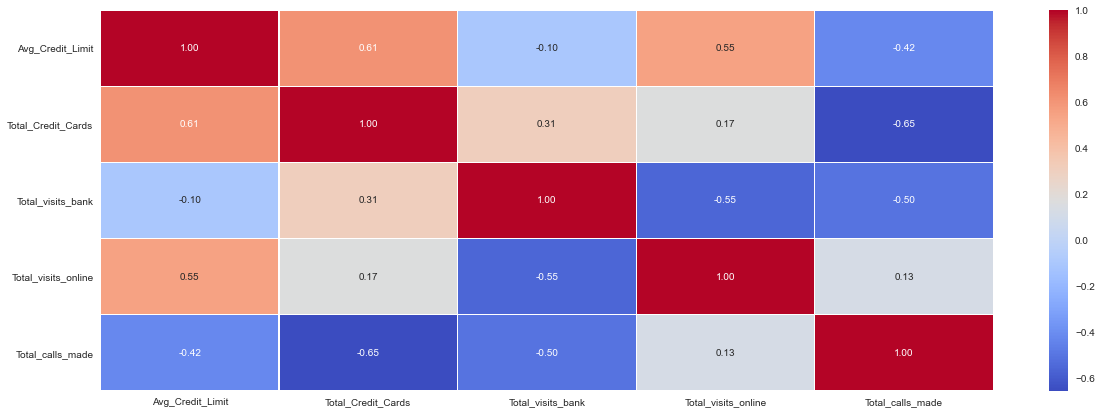

In [211]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 


####   OBSERVATIONS:
* Avg_Credit_Limit has a high positive correlation with Total_Credit_Cards and Total_Visits_Online.
* Avg_Credit_Limit has a negayive correlation with Total_calls_made.
* Total_Credit_Cards has a positive correlations with TOtal_visits_bank and a negative correlation with Total_calls_made.
* TOtal_visits_bank has a negative correlation with both Total_visits_online and Total_calls_made.

#### PLOT BOXPLOTS OF ALL NUMERIC VARIABLES IN ONE PLOT TO SEE OUTLIERS PRESENT

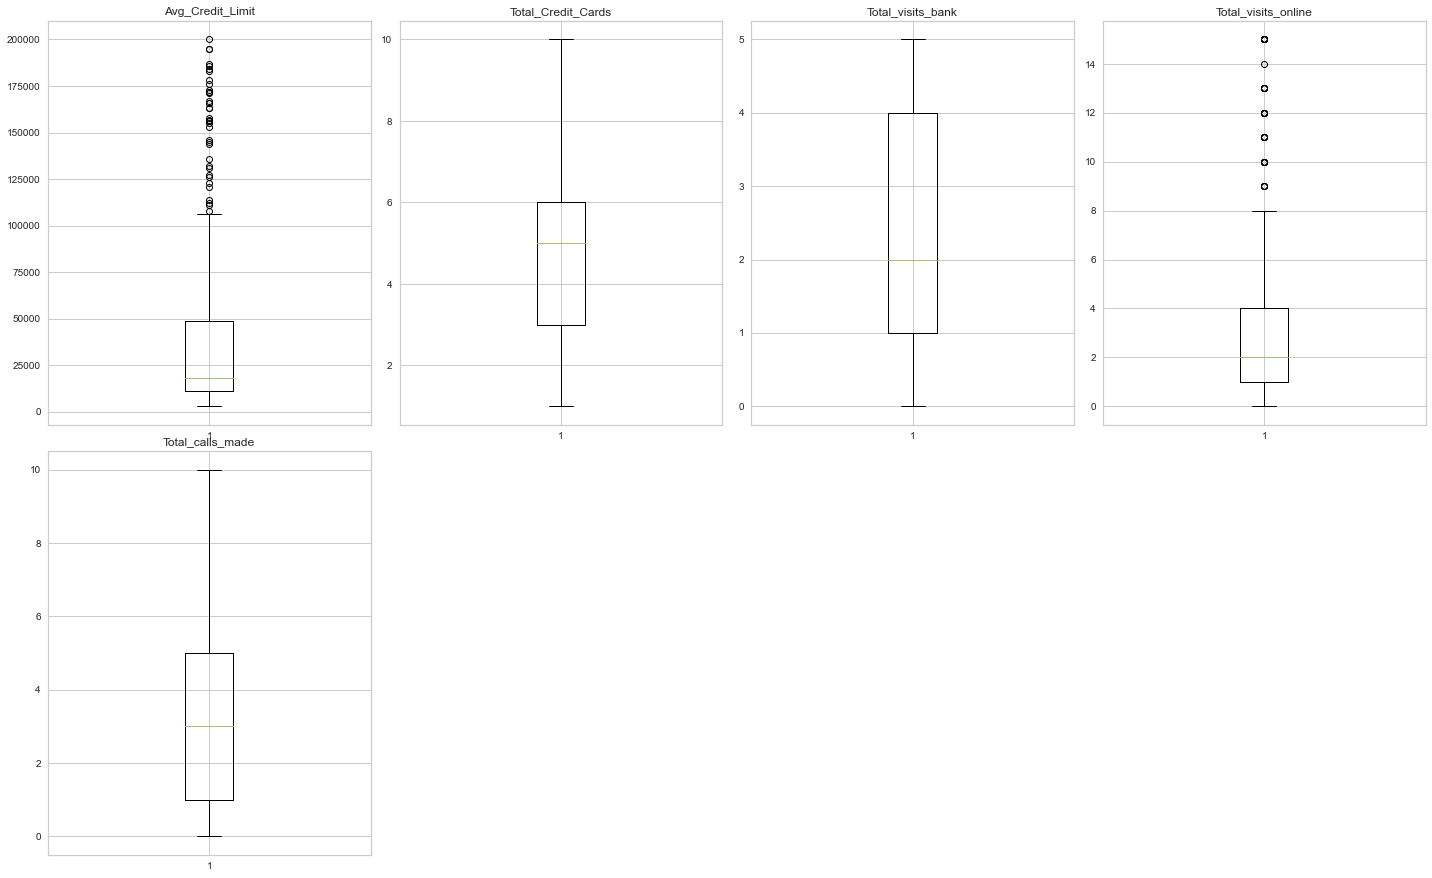

In [212]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist() #all numeric columns

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

####   OBSERVATIONS:
* Avg_Credit_Limit and Total_visits_online have outliers.

## TREAT OUTLIERS

In [213]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):

    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    lower_whisker = Q1 - 1.5*IQR 
    upper_whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker) # all the values samller than Lower_Whisker will be given value of Lower_whisker 
                                                            # and all the values above upper_whishker will be given value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
   
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [214]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist() # get list of numerical columns
df = treat_outliers_all(df,numerical_col)

#### Check that outliers were removed

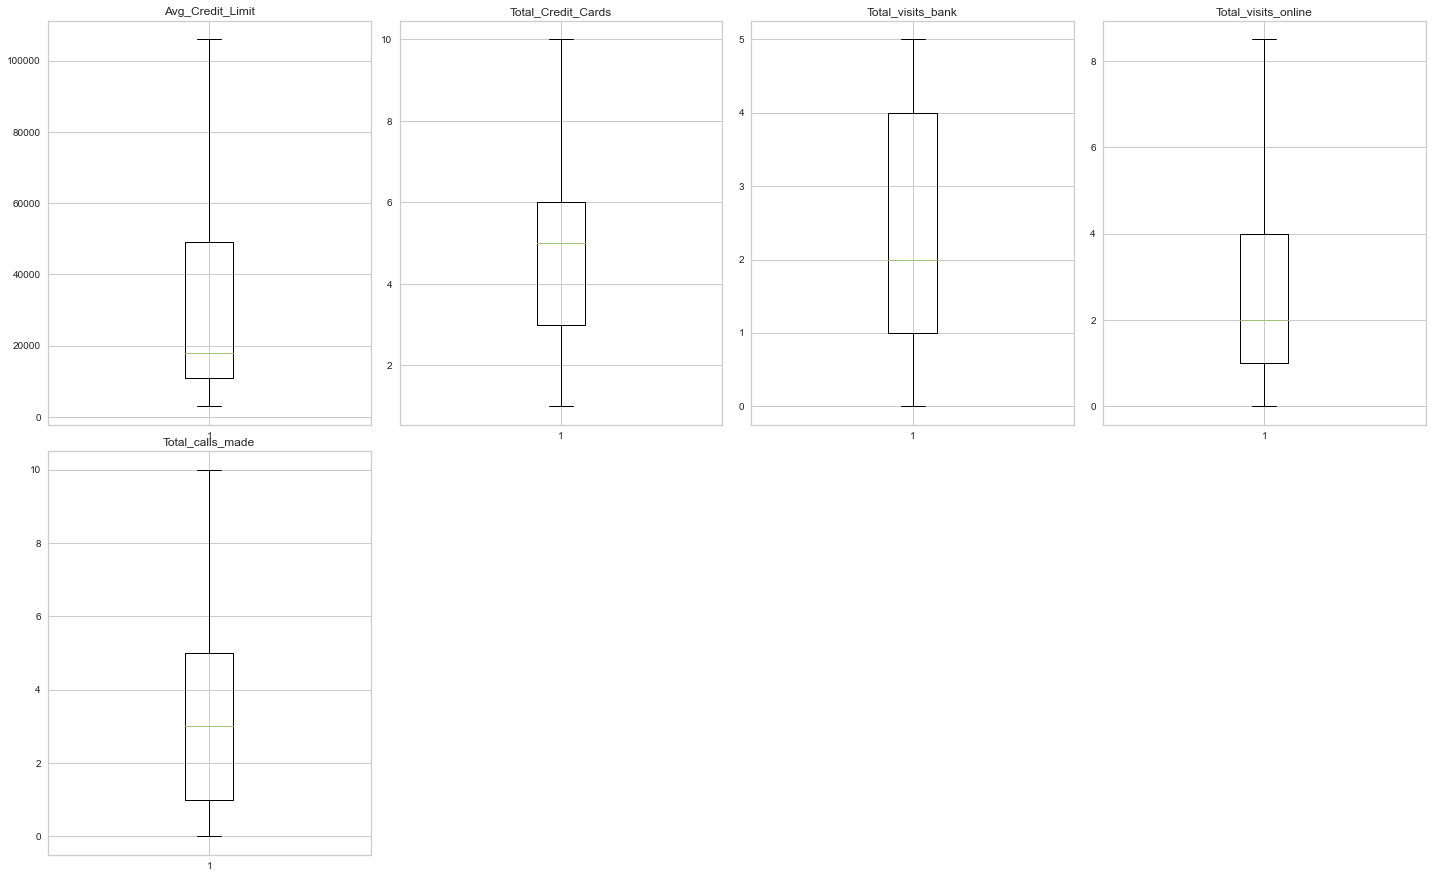

In [215]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist() #all numeric columns

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#### Outliers have been removed

### Scale the data

In [216]:

numeric_columns

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [217]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[numeric_columns].copy()
subset_scaled=scaler.fit_transform(subset)   

In [218]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

In [234]:
subset_scaled_df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.366936,-1.247087,-0.860606,-0.623244,-1.248443
1,0.627015,-0.786701,-1.476410,2.686783,1.881237
2,0.627015,1.054846,-0.860606,0.259430,0.142526
3,-0.068953,0.134072,-0.860606,-0.623244,0.142526
4,2.366936,0.594459,-1.476410,2.686783,-0.205216
5,-0.416938,-0.786701,-1.476410,-0.623244,1.533495
6,2.366936,0.134072,-1.476410,2.686783,-0.552958
7,-0.590930,-0.786701,-1.476410,-0.623244,-0.900701
8,-0.938914,-1.247087,-1.476410,-0.181907,-0.552958
9,-1.008511,-0.326314,-1.476410,-0.623244,1.185753


## K Means

Number of Clusters: 1 	Average Distortion: 2.073136602035325
Number of Clusters: 2 	Average Distortion: 1.4978375339862937
Number of Clusters: 3 	Average Distortion: 1.1772224293618558
Number of Clusters: 4 	Average Distortion: 1.0689466335012165
Number of Clusters: 5 	Average Distortion: 1.0016955129065774
Number of Clusters: 6 	Average Distortion: 0.9489097302225579
Number of Clusters: 7 	Average Distortion: 0.9121195536214252
Number of Clusters: 8 	Average Distortion: 0.8876383354332447


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

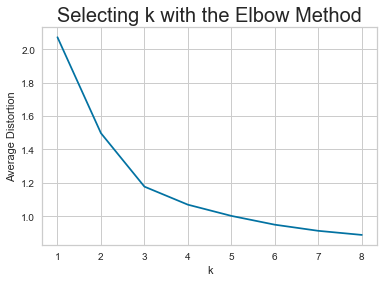

In [219]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

#### Appropriate k seems to be 3

### Check silhoutte score

In [220]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41999597804777794)
For n_clusters = 3, silhouette score is 0.5180797381243987)
For n_clusters = 4, silhouette score is 0.37986496617829596)
For n_clusters = 5, silhouette score is 0.35436715479214803)
For n_clusters = 6, silhouette score is 0.2724536134542344)
For n_clusters = 7, silhouette score is 0.26723112360762935)
For n_clusters = 8, silhouette score is 0.2561983091314131)
For n_clusters = 9, silhouette score is 0.24604774541025837)


#### Silhouette score closest to 1 is with 3 clusters

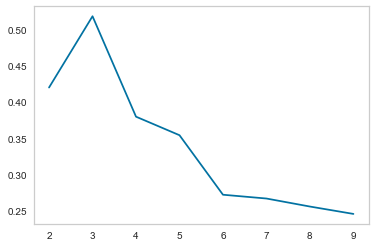

In [221]:
plt.plot(cluster_list,sil_score)
plt.grid()

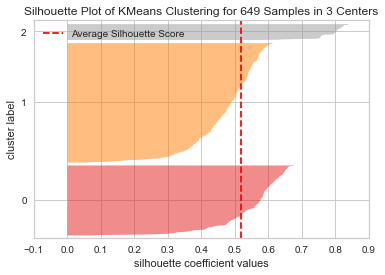

In [222]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

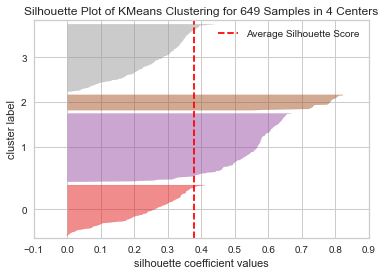

In [223]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

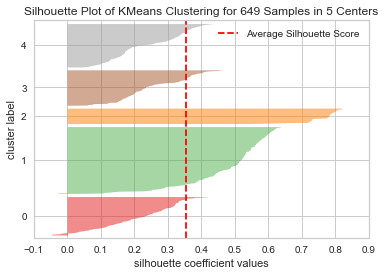

In [224]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

#### Silhouette score for 3 is high for them most clusters and we will use that, it is the same as what the elbow method was showing us

In [225]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [238]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_


In [240]:
cluster_profile = subset_scaled_df.groupby('K_means_segments').mean()

In [241]:
cluster_profile['count_in_each_segment'] = subset_scaled_df.groupby('K_means_segments')['Total_visits_bank'].count().values

In [242]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,0.072726,0.372791,0.669127,-0.631417,-0.555718,378
1,-0.686980,-1.057516,-0.894044,0.504062,1.147989,221
2,2.486642,1.855918,-1.106928,2.545555,-0.872881,50


In [248]:
custDataClust = df.groupby(['K_means_segments'])

In [249]:
custDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063
1,12239.819005,2.411765,0.945701,3.554299,6.891403
2,103440.000000,8.740000,0.600000,8.180000,1.080000


#### OBSERVATIONS:

* Clients with a higher Average credit limit are in clusters together and we can see teh same trend as we saw in EDA that these clients have a higher number of credit cards.

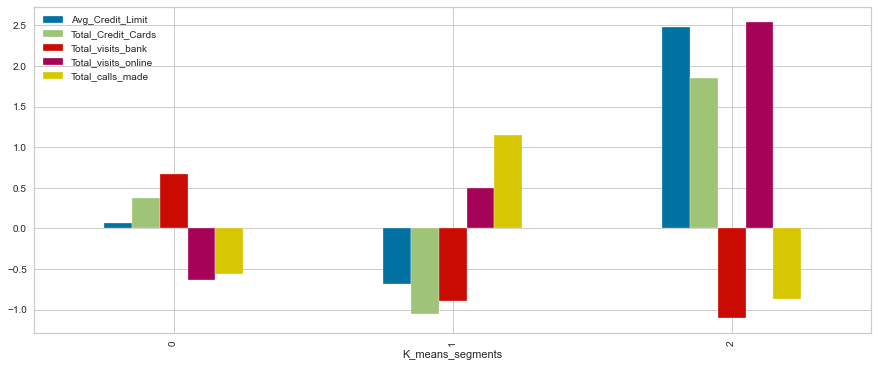

In [243]:
subset_scaled_df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

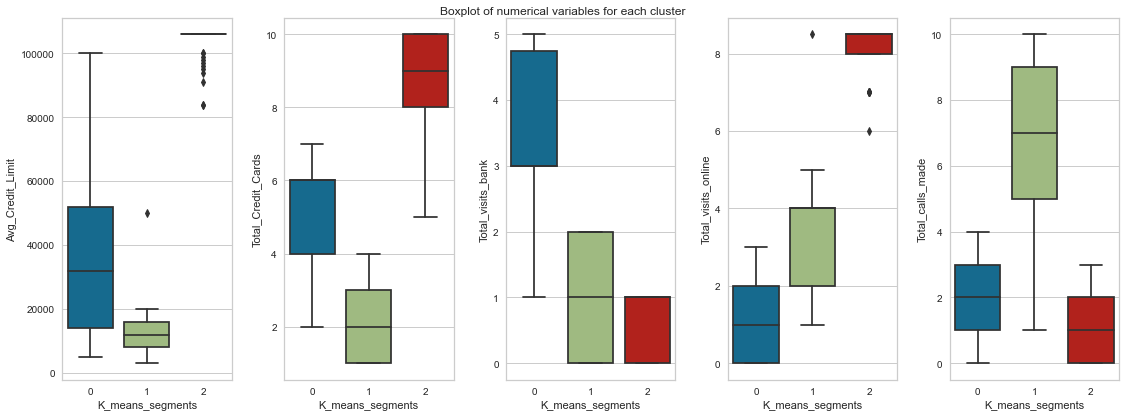

In [232]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[numeric_columns[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### OBSERVATIONS:
* the clusters dont overlap much other than  with respect to Total_visits_online and Total_Calls_made.

## Hierarchical clustering

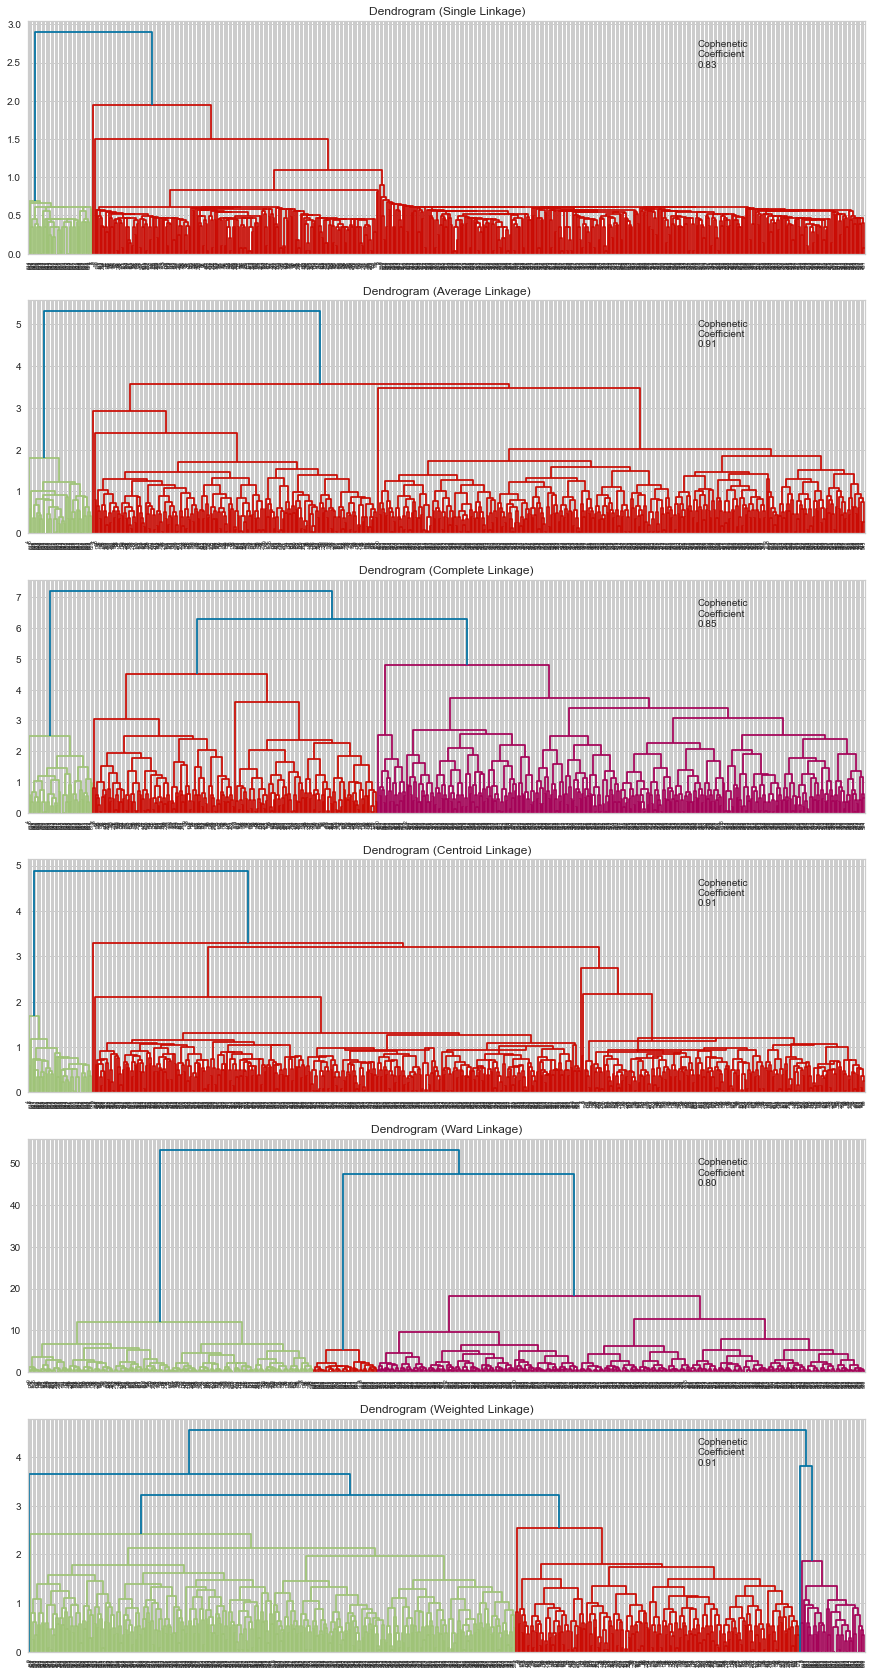

In [247]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr

#### We can see that the dendogram with WARD linkage method seems to give distinct clusters

* 4 clusters seems to be a good estimate from the ward linkage dendogram

### Create 4 clusters

In [252]:
#Trying with K value as 4
HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [253]:
df['HC_Clusters'] = HCmodel.labels_

In [254]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [256]:
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['Total_visits_bank'].count().values

In [257]:
# display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,18977.477477,5.509009,3.774775,1.022523,1.923423,0,222
1,12239.819005,2.411765,0.945701,3.554299,6.891403,1,221
2,103440.000000,8.740000,0.600000,8.180000,1.080000,2,50
3,55551.282051,5.532051,3.070513,0.923077,2.089744,0,156


### Observation:

* K Means seems to have grouped the clusters similarly to Hierarchical clustering except that we picked the number of clusters at 3 using the elbow method. 
* K means combined the cluster 3 above with cluster 0 to form 1 big cluster, this is the mid level group as per avg credit limit


#### Boxplot of numeric variables of scaled data

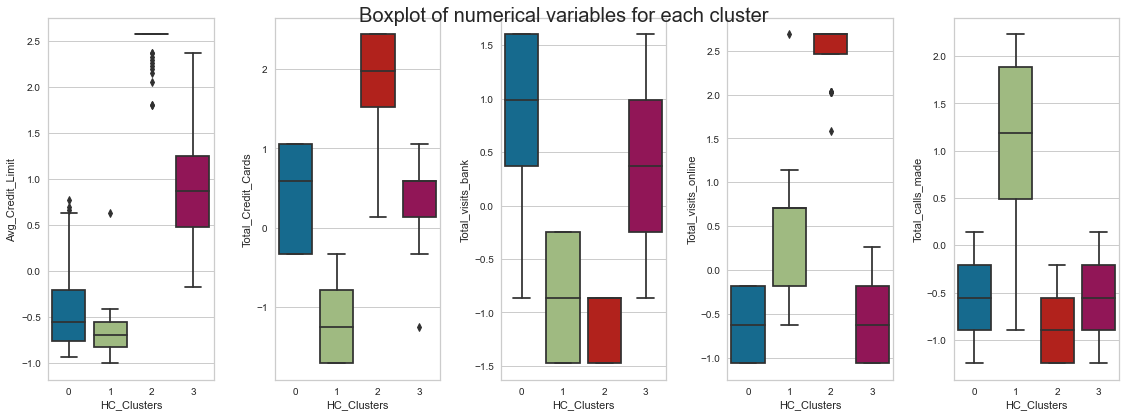

In [258]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[numeric_columns[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Boxplot of numeric variables of unscaled data

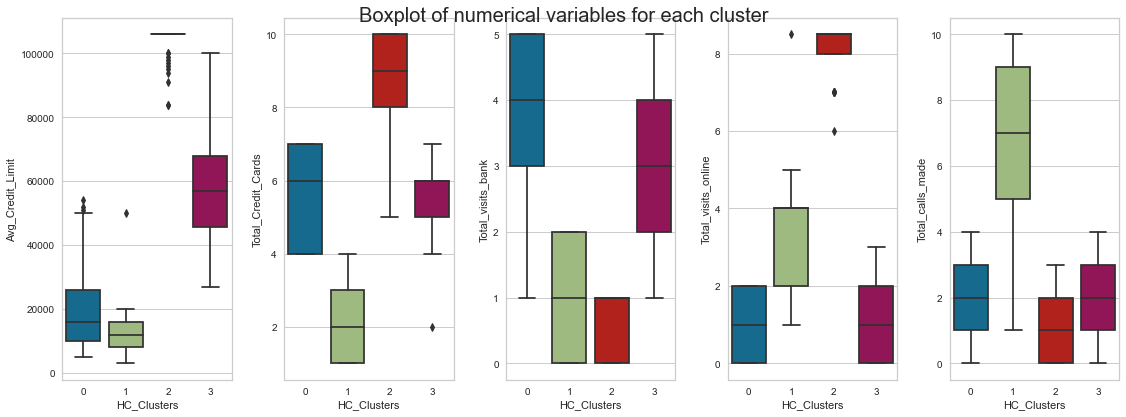

In [259]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[numeric_columns[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

#### Cluster 0:

* The clients in this cluster have a median average credit limit of about 16,000
* Most clients in this cluster have 4-7 credit cards, probably because of the lower credit limits.
* Clients in this cluster visit the bank the most with 4 median visits.
* clients in this cluster do not call or visit the bank online much, which is because of their high numbr of visits to the bank. Maybe the bank is in an area with lots of offices and these clients easily stop at the bank, whenever they need to.

#### Cluster 1:

* clients in this cluster have a median avg credit limit of about 12,000, lower than the clients in cluster 0
* clients in this cluster have 1-3 credit cards, maybe thei credit is bad that prevents them from getting approved for credit cards.
* clients in this cluster dont call or visit the bank too much but their total calls made to the bank has a median of 7 calls.

#### Cluster 2:

* Clients in this cluster have a very high average credit limit and the median number of credit cards they hold is high as well at 9 cards
* They mostly go online but do not call or visit the bank much.

#### Cluster 3:

* these clients also have a high avg credit limit at about 56,000, and have higher number of credit cards.
* They make a median of 3 visits to the bank but dont call or visit the bank online much.
